In [217]:
%matplotlib notebook
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.measure import moments, moments_central
from scipy.ndimage import center_of_mass

In [11]:
lk.search_targetpixelfile('TIC441398770', author='SPOC')

SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 01 2018   SPOC     120   441398770      0.0
  1 TESS Sector 27 2020   SPOC      20   441398770      0.0
  2 TESS Sector 27 2020   SPOC     120   441398770      0.0

In [9]:
tpf = lk.search_targetpixelfile('AT Mic', author='SPOC', sector=27, exptime=120).download()


In [16]:
tpf[0:2500].interact()

<AxesSubplot:title={'center':'Target ID: 441398770, 2036.28 - 2043.24 [BTJD days]'}, xlabel='Time / Column (pixel)', ylabel='Flux / Row (pixel)'>

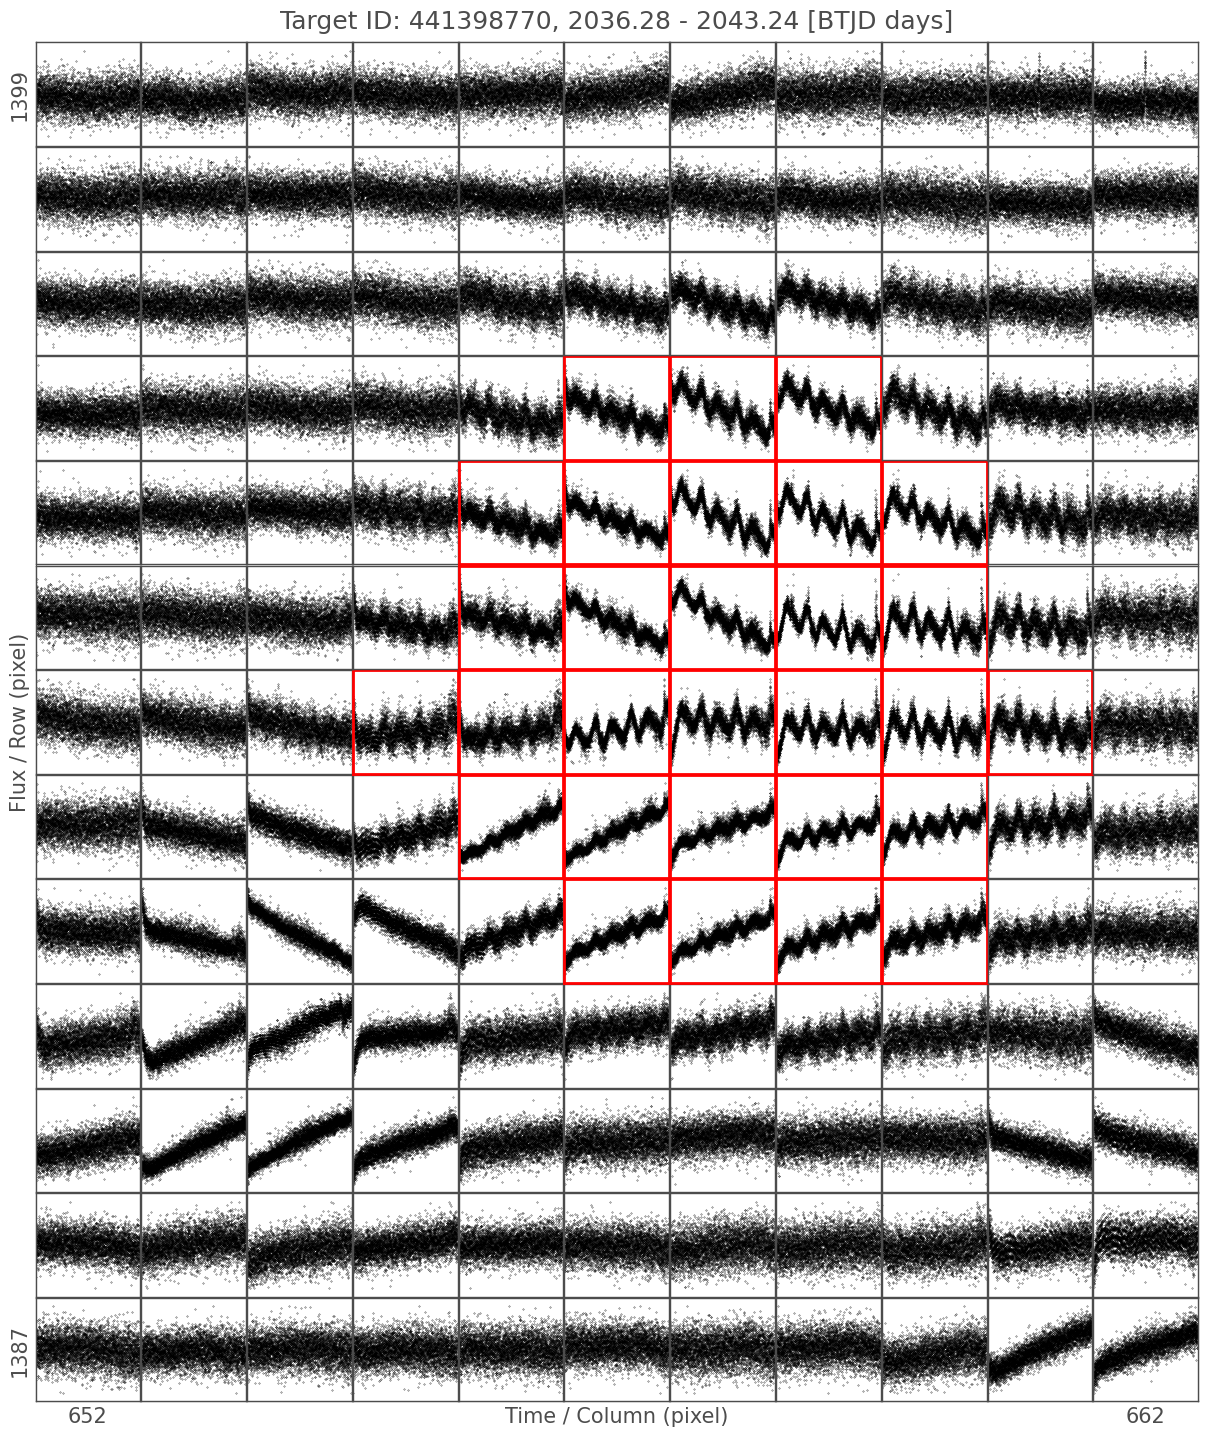

In [17]:
tpf[0:5000].plot_pixels(aperture_mask='pipeline')

<IPython.core.display.Javascript object>


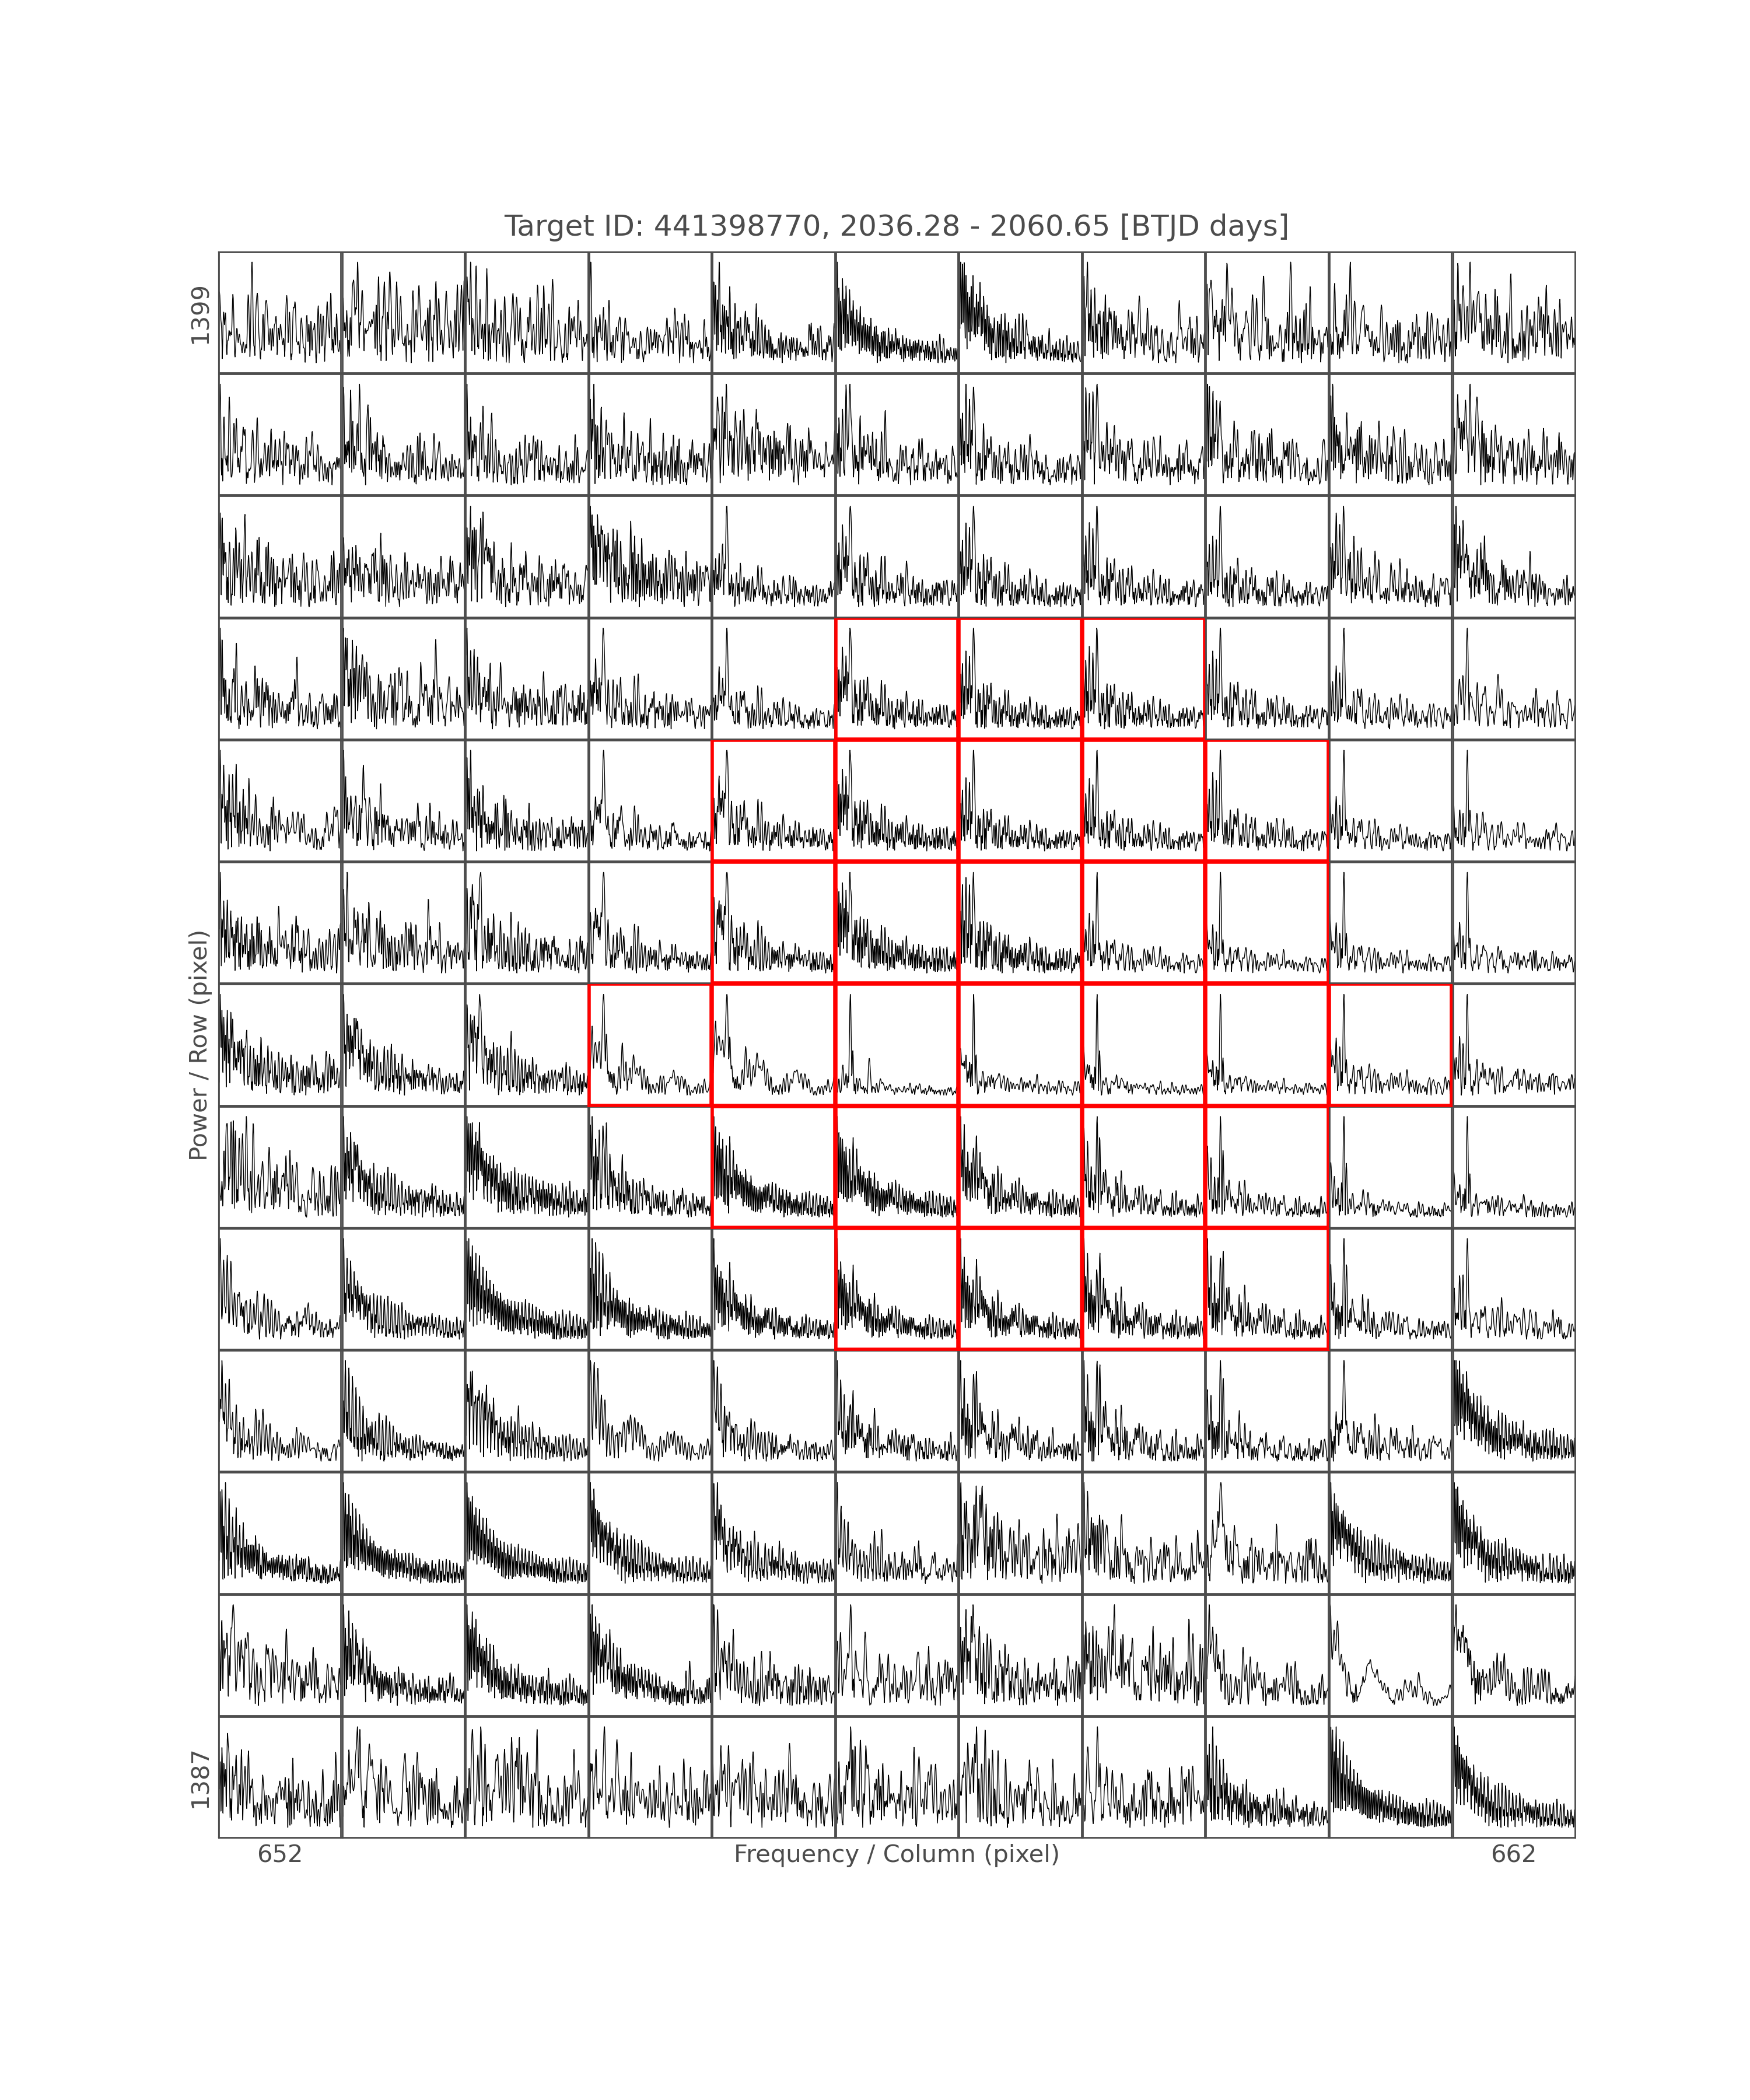

<AxesSubplot:title={'center':'Target ID: 441398770, 2036.28 - 2060.65 [BTJD days]'}, xlabel='Frequency / Column (pixel)', ylabel='Power / Row (pixel)'>

In [70]:
tpf.plot_pixels(aperture_mask='pipeline', periodogram=True, minimum_period=0.3, maximum_period=2)

In [14]:
lc = lk.search_lightcurve('TIC441398770', author='SPOC', exptime=120).download_all()

<IPython.core.display.Javascript object>


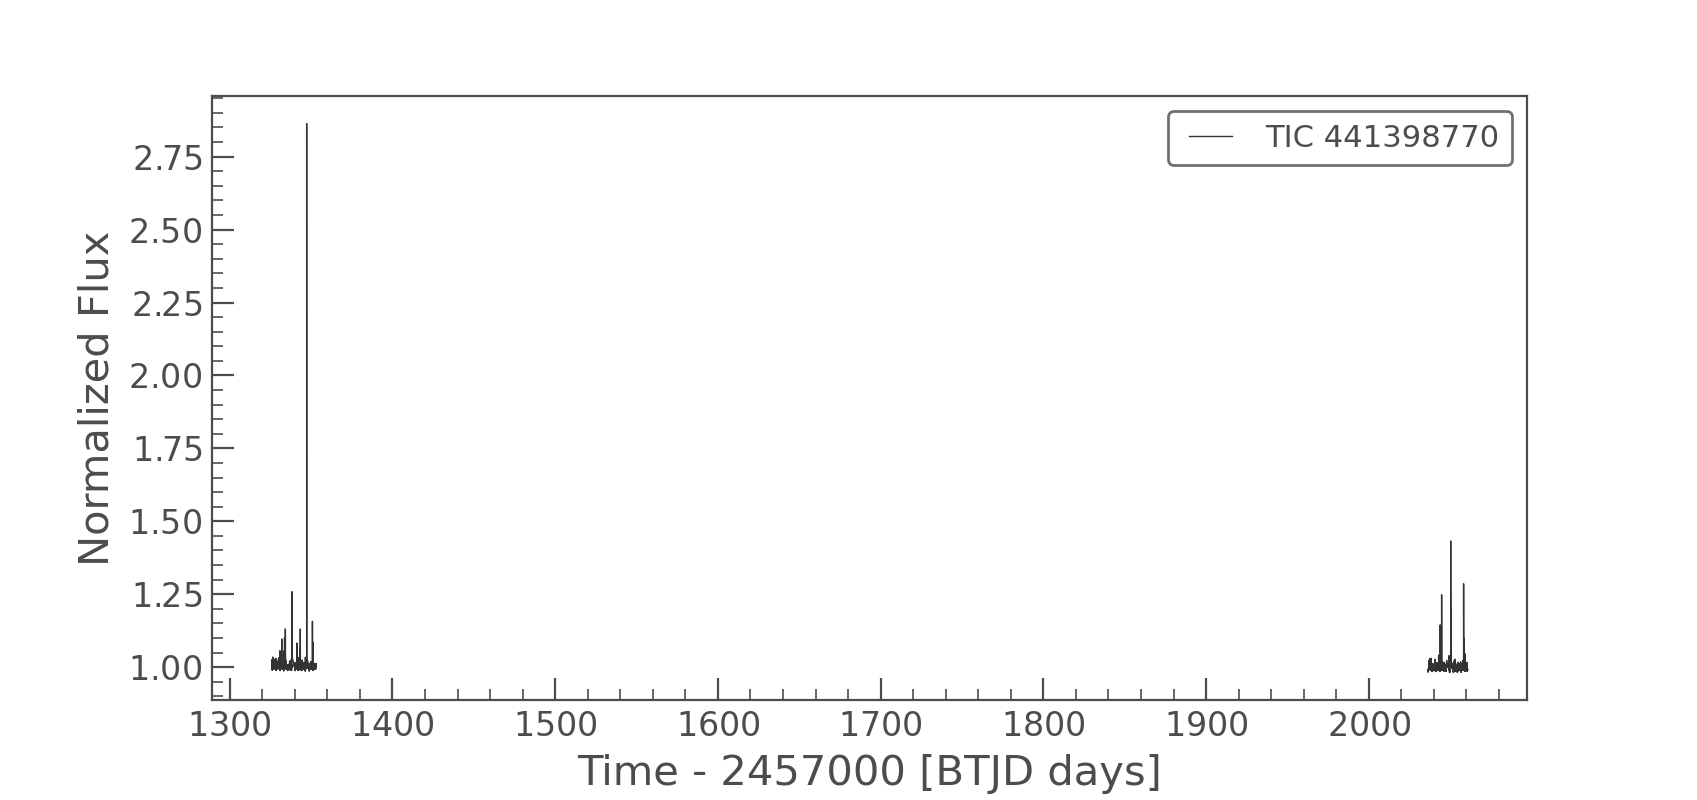

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [43]:
lc2 = lc.stitch()
lc2.plot()

In [50]:
pg = lc2.to_periodogram(oversample_factor=1, minimum_period=0.05, maximum_period=5)


<IPython.core.display.Javascript object>


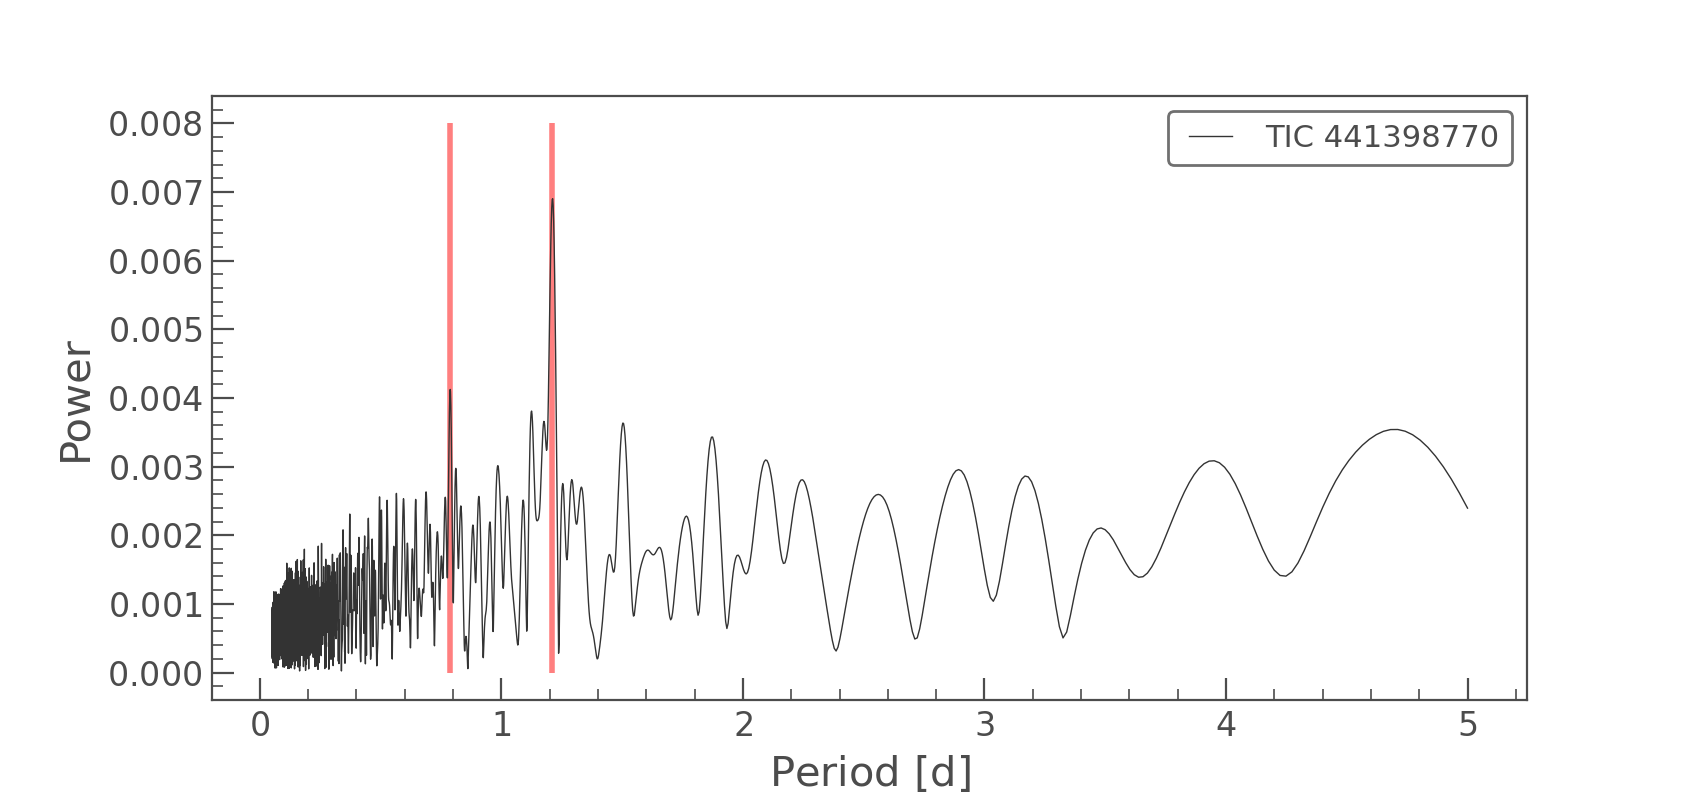

In [57]:
pg.plot(view='period');
Per = [1.2116, 0.7882]
plt.vlines(Per, 0, 0.008, color='r', lw=2, alpha=0.5)

In [85]:
fold0 = lc2.fold(Per[0])
fold1 = lc2.fold(Per[1])
fb0 = fold0.bin(time_bin_size=0.002, aggregate_func=np.nanmedian)
fb1 = fold1.bin(time_bin_size=0.002, aggregate_func=np.nanmedian)

<IPython.core.display.Javascript object>


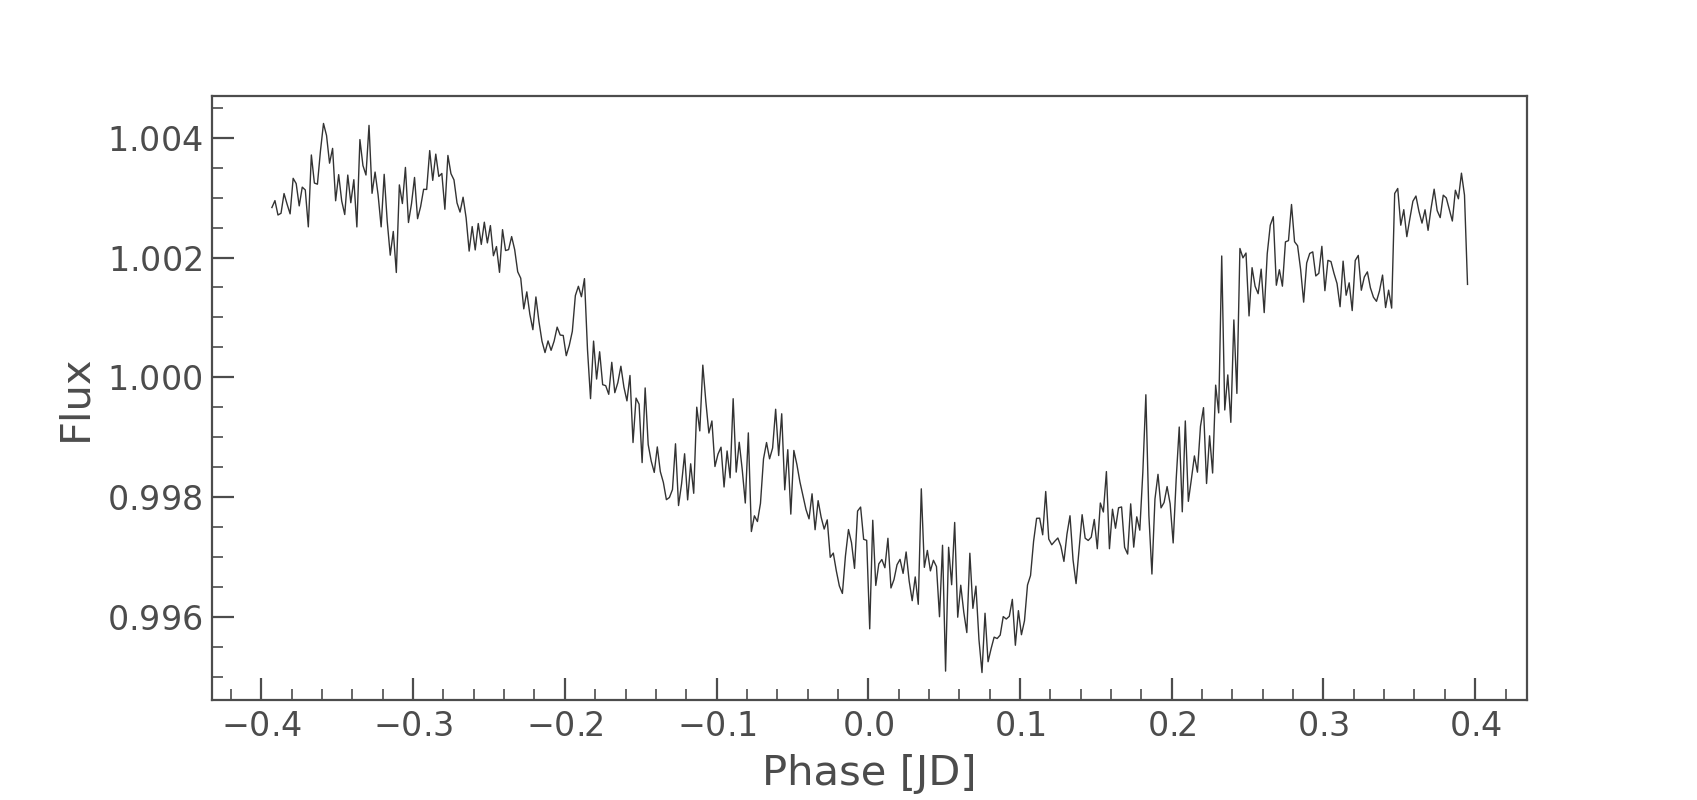

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

In [87]:
fb1.plot()

<IPython.core.display.Javascript object>


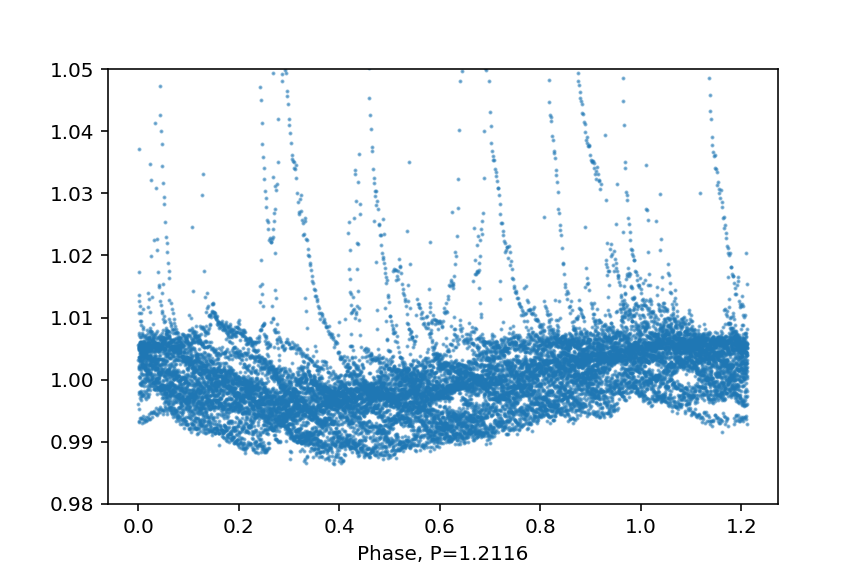

Text(0.5, 0, 'Phase, P=1.2116')

In [65]:
plt.scatter(lc[0]['time'].value % Per[0], lc[0]['flux'].value/np.nanmedian(lc[0]['flux'].value), 
            s=1, alpha=0.5)
plt.ylim(.98,1.05)
plt.xlabel('Phase, P='+str(Per[0]))

<IPython.core.display.Javascript object>


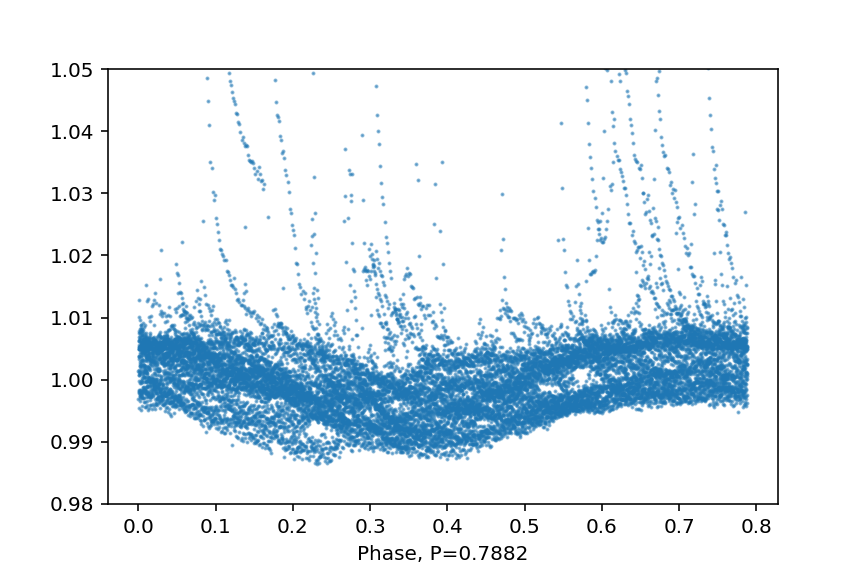

Text(0.5, 0, 'Phase, P=0.7882')

In [66]:
plt.scatter(lc[0]['time'].value % Per[1], lc[0]['flux'].value/np.nanmedian(lc[0]['flux'].value), 
            s=1, alpha=0.5)
plt.ylim(.98,1.05)
plt.xlabel('Phase, P='+str(Per[1]))

In [67]:
Per[1] / Per[0]

0.6505447342357213

In [93]:
lc[0].remove_nans()

<TessLightCurve length=17721 LABEL="TIC 441398770" SECTOR=1 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
       time             flux      ...   pos_corr1      pos_corr2   
                    electron / s  ...      pix            pix      
      object          float32     ...    float32        float32    
------------------ -------------- ... -------------- --------------
1325.9430501028987  9.7729758e+04 ... -1.1313895e-01  1.3854448e-01
1325.9444389875048  9.7781820e+04 ... -1.1431437e-01  1.4958496e-01
1325.9458278721104  9.7715281e+04 ... -1.1732209e-01  1.6270471e-01
1325.9472167567174  9.7704305e+04 ... -1.1172530e-01  1.3842843e-01
1325.9486056413243  9.7757766e+04 ... -1.0038484e-01  1.5493679e-01
1325.9499945259297  9.7747969e+04 ... -1.4799550e-01  1.5947114e-01
 1325.951383410536  9.7786156e+04 ... -1.0576677e-01  1.4372683e-01
1325.9527722951427  9.7702398e+04 ... -1.0927667e-01  1.6359811e-01
1325.9541611802138  9.7703789e+04 ... -1.1588813e-01  1.5788759e-01
               ...            ... ...            ...            ...
1353.0327727504368  9.8755938e+04 ...  1.0367762e-01 -7.9779662e-02
1353.0341615852192  9.8572695e+04 ...  1.8527293e-01 -7.5033113e-02
1353.0355504204672  9.8572031e+04 ...  1.0956514e-01 -9.2596166e-02
1353.0369392552493  9.8540930e+04 ...  1.5629317e-01 -1.0203645e-01
1353.0383280904966  9.8511898e+04 ...  1.6995406e-01 -1.1501867e-01
1353.0397169252783  9.8447055e+04 ...  1.1030646e-01 -9.4808407e-02
1353.0411057600609  9.8477812e+04 ...  1.5858012e-01 -1.1085746e-01
 1353.042494595309  9.8474477e+04 ...  1.5062849e-01 -8.0480918e-02
1353.0438834300903  9.8461477e+04 ...  1.6539502e-01 -1.1155156e-01
 1353.045272264872  9.8484016e+04 ...  1.6139439e-01 -1.1069603e-01

<IPython.core.display.Javascript object>


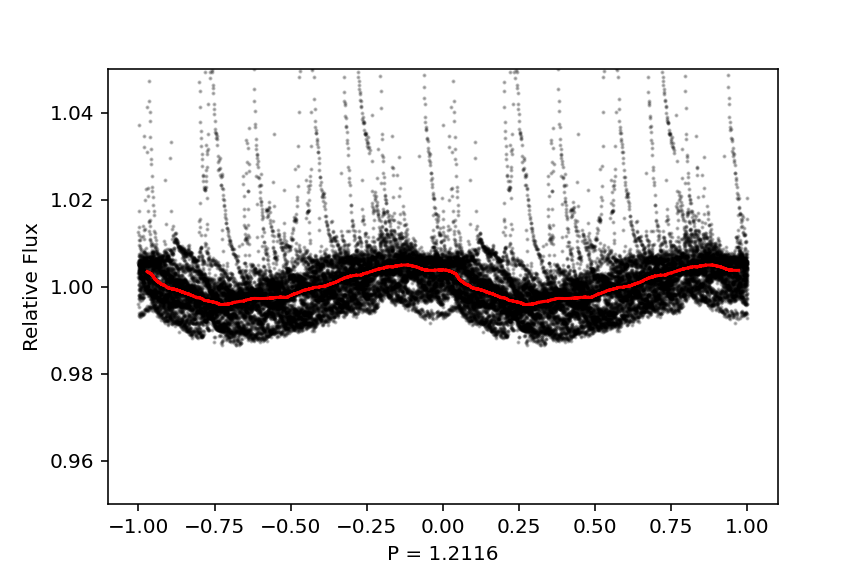

(0.95, 1.05)

In [96]:
phz1 = np.hstack(((lc[0].remove_nans()['time'].value % Per[0])/Per[0]-1, 
                  (lc[0].remove_nans()['time'].value % Per[0])/Per[0]))
pfl1 = np.tile(lc[0].remove_nans()['flux'].value/np.nanmedian(lc[0].remove_nans()['flux'].value), 2)

ss1 = np.argsort(phz1)
psmo1 = pd.Series(pfl1[ss1]).rolling(1000, center=True).median()

ind1 = np.hstack((np.arange(len(lc[0].remove_nans()['time'].value)), np.arange(len(lc[0].remove_nans()['time'].value))))
out1 = np.where((phz1[ss1] >= -0.5) & (phz1[ss1] < 0.5))[0]
sout1 = np.argsort(ind1[ss1][out1])

plt.scatter(phz1, pfl1, s=1, alpha=0.25, c='k')
plt.plot(phz1[ss1], psmo1, c='r')
plt.xlabel('P = '+str(Per[0]))
plt.ylabel('Relative Flux')
plt.ylim(.95,1.05)

<IPython.core.display.Javascript object>


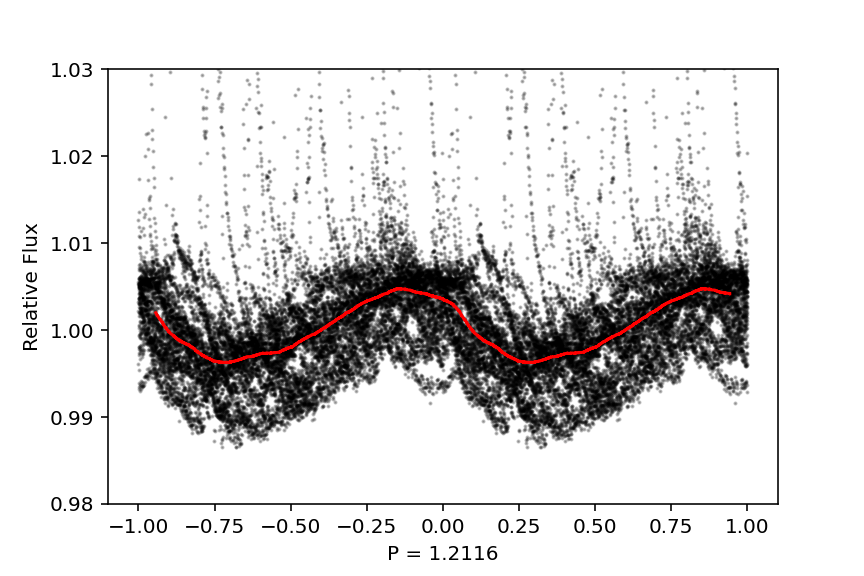

In [101]:
phz1 = np.hstack(((lc[0].remove_nans()['time'].value % Per[0])/Per[0]-1, 
                  (lc[0].remove_nans()['time'].value % Per[0])/Per[0]))
pfl1 = np.tile(lc[0].remove_nans()['flux'].value/np.nanmedian(lc[0].remove_nans()['flux'].value), 2)

ss1 = np.argsort(phz1)
psmo1 = pd.Series(pfl1[ss1]).rolling(2000, center=True).median()

ind1 = np.hstack((np.arange(len(lc[0].remove_nans()['time'].value)), np.arange(len(lc[0].remove_nans()['time'].value))))
out1 = np.where((phz1[ss1] >= -0.5) & (phz1[ss1] < 0.5))[0]
sout1 = np.argsort(ind1[ss1][out1])

plt.scatter(phz1, pfl1, s=1, alpha=0.25, c='k')
plt.plot(phz1[ss1], psmo1, c='r')
plt.xlabel('P = '+str(Per[0]))
plt.ylabel('Relative Flux')
plt.ylim(.98,1.03)

model1 = psmo1[out1].values[sout1] - 1

<IPython.core.display.Javascript object>


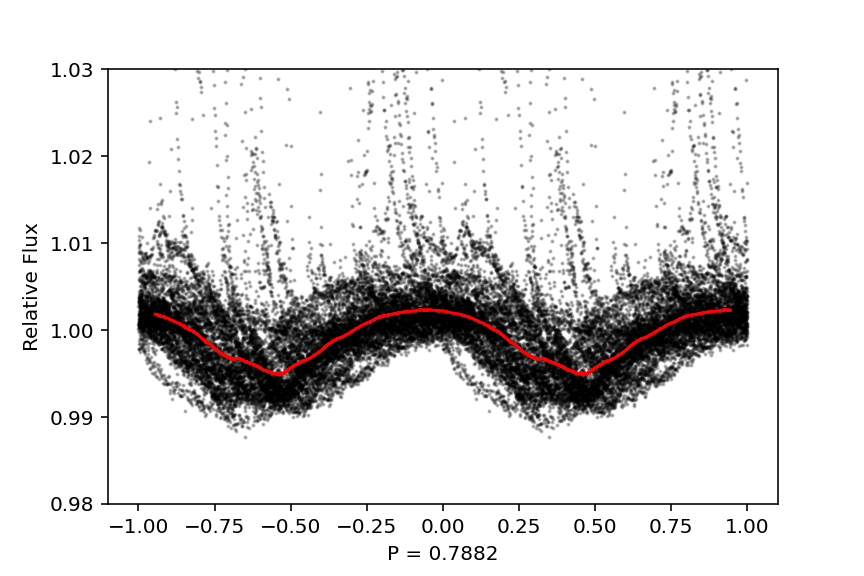

In [106]:
phz2 = np.hstack(((lc[0].remove_nans()['time'].value % Per[1])/Per[1]-1, 
                  (lc[0].remove_nans()['time'].value % Per[1])/Per[1]))
pfl2 = np.tile(lc[0].remove_nans()['flux'].value/np.nanmedian(lc[0].remove_nans()['flux'].value) - model1, 2)

ss2 = np.argsort(phz2)
psmo2 = pd.Series(pfl2[ss2]).rolling(2000, center=True).median()

ind2 = np.hstack((np.arange(len(lc[0].remove_nans()['time'].value)), np.arange(len(lc[0].remove_nans()['time'].value))))
out2 = np.where((phz2[ss2] >= -0.5) & (phz2[ss2] < 0.5))[0]
sout2 = np.argsort(ind2[ss2][out2])

plt.scatter(phz2, pfl2, s=1, alpha=0.25, c='k')
plt.plot(phz2[ss2], psmo2, c='r')
plt.xlabel('P = '+str(Per[1]))
plt.ylabel('Relative Flux')
plt.ylim(.98,1.03)

model2 = psmo2[out2].values[sout2] - 1

<IPython.core.display.Javascript object>


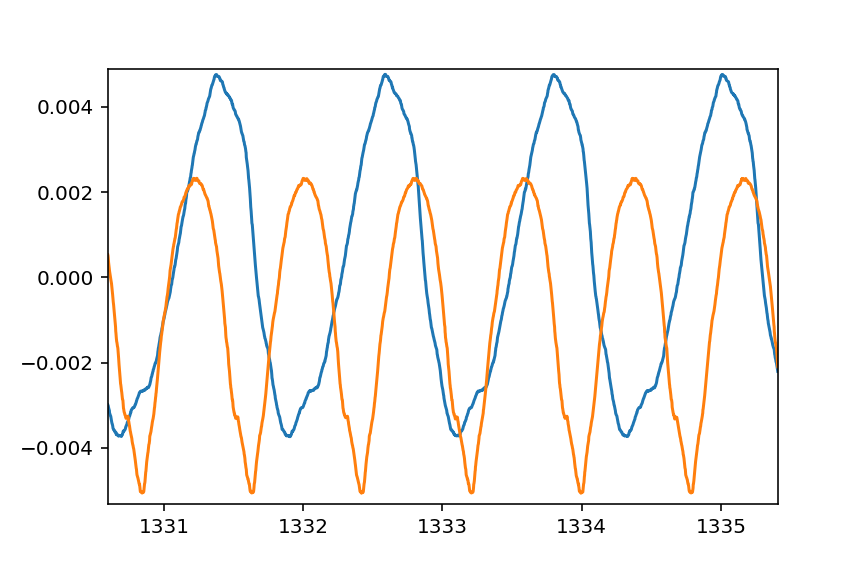

In [116]:
plt.plot(lc[0].remove_nans()['time'].value, model1)
plt.plot(lc[0].remove_nans()['time'].value, model2)

<IPython.core.display.Javascript object>


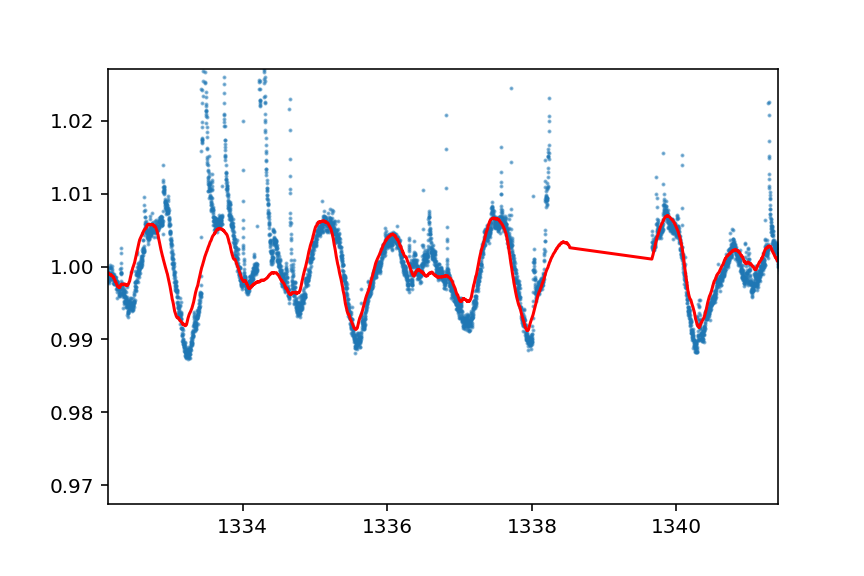

In [115]:
plt.scatter(lc[0]['time'].value, lc[0]['flux'].value/np.nanmedian(lc[0]['flux'].value), 
            s=1, alpha=0.5)
plt.ylim(.98,1.03)
# plt.xlabel('Phase, P='+str(Per[1]))
plt.plot(lc[0].remove_nans()['time'].value, 1 + model1 + model2, c='r')
# plt.plot(lc[0].remove_nans()['time'].value, model2)

<IPython.core.display.Javascript object>


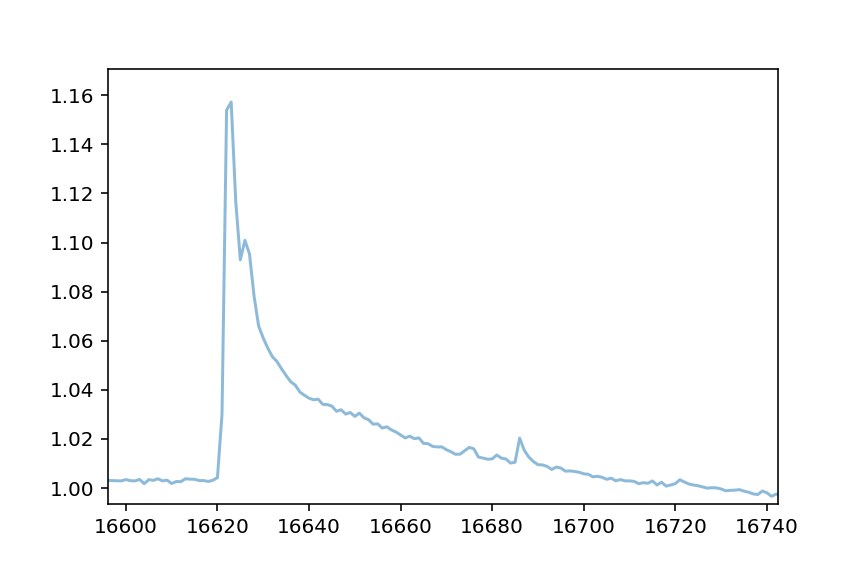

In [137]:
plt.plot(lc[0]['flux'].value/np.nanmedian(lc[0]['flux'].value), alpha=0.5)


In [117]:
avg_image = np.nanmean(tpf.flux.value, axis=0)
med_image = np.nanmedian(tpf.flux.value, axis=0)

In [118]:
# diff_image = np.abs(np.nanmean(one_quarter_maxima, axis=0) - np.nanmean(one_quarter_minima, axis=0))
diff1 = tpf.flux.value - avg_image
diff2 = tpf.flux.value - med_image

<IPython.core.display.Javascript object>


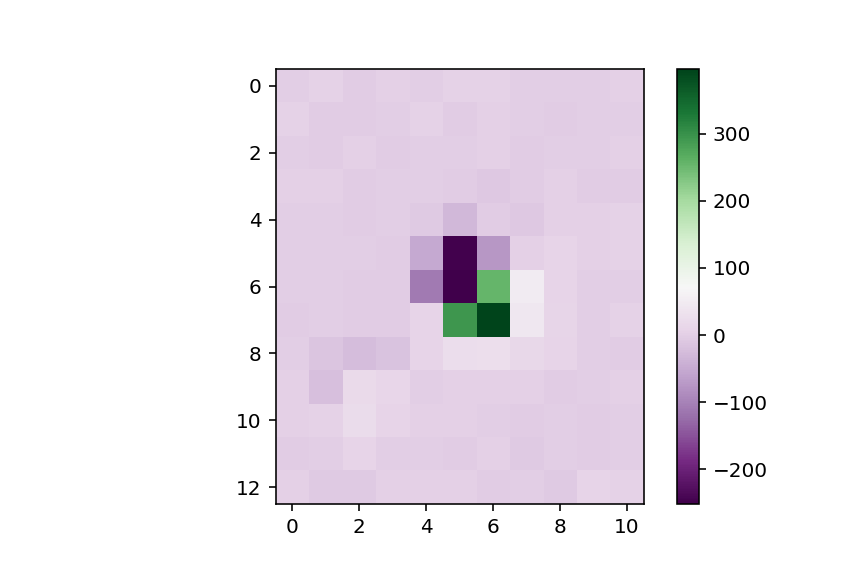

In [140]:
plt.imshow(np.flipud(tpf.flux.value[14835,:,:] - tpf.flux.value[(14880),:,:]), cmap=plt.cm.PRGn)
plt.colorbar()

<IPython.core.display.Javascript object>


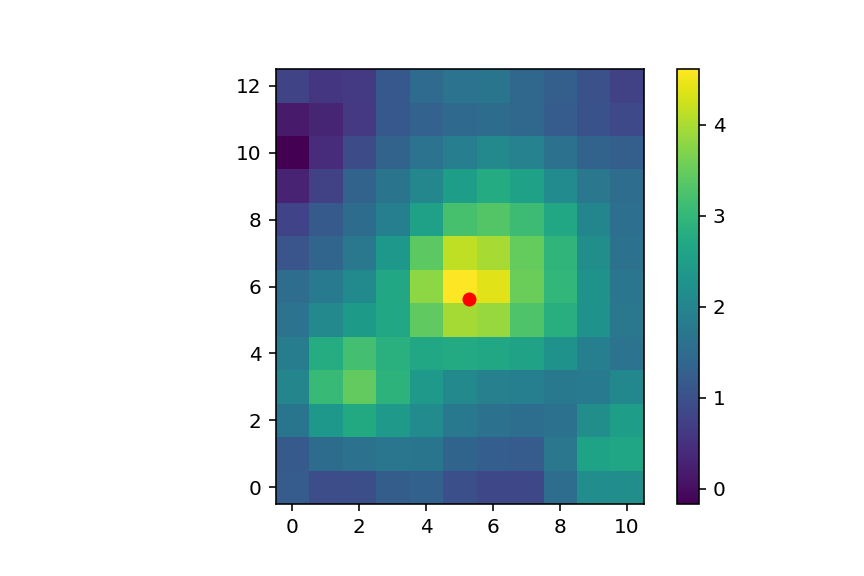

In [327]:
plt.imshow(np.log10(np.nanmedian(tpf.flux.value[:,:,:],axis=0)+2), origin='lower')
plt.colorbar()

# plt.contour(np.log10(np.nanmedian(tpf.flux.value[:,:,:],axis=0)+2), colors='k')

COM = center_of_mass(np.log10(np.nanmedian(tpf.flux.value[:,:,:],axis=0)+2))
plt.scatter(COM[1], COM[0], c='r')

In [191]:
tpf.flux.value.shape

(16781, 13, 11)

<IPython.core.display.Javascript object>


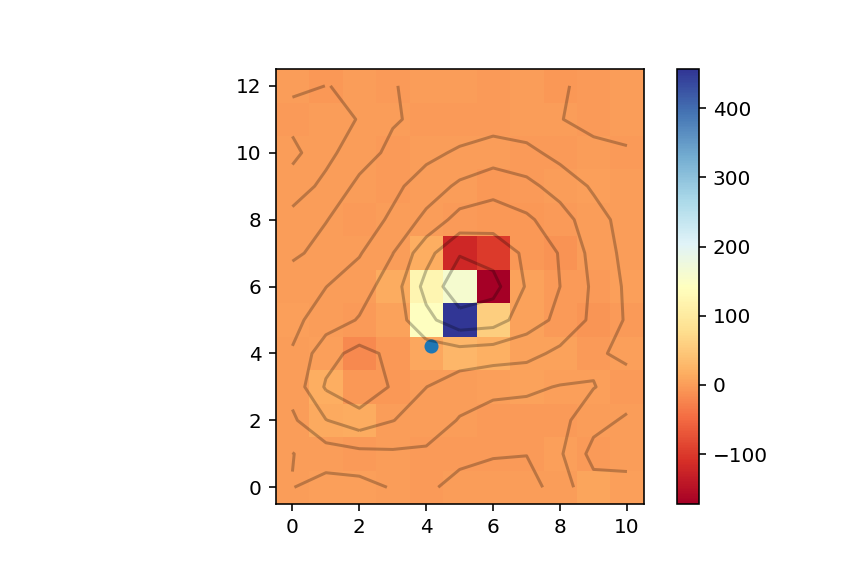

(4.230262424794735, 4.148746593694668)


In [235]:
diff = np.nanmedian(tpf.flux.value[16622:16624,:,:],axis=0) - np.nanmedian(tpf.flux.value[16600:16618,:,:],axis=0)
plt.imshow(diff, cmap=plt.cm.RdYlBu, origin='lower')
plt.colorbar()
# plt.clim(-3*np.std(diff), 3*np.std(diff))

plt.contour(np.log10(np.nanmedian(tpf.flux.value[:,:,:],axis=0)+2), alpha=0.25, colors='k')

# M = moments(diff)
# centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
# plt.scatter(centroid[1], centroid[0], c='r')

print(center_of_mass(diff))
plt.scatter(center_of_mass(diff)[1], center_of_mass(diff)[0])

<IPython.core.display.Javascript object>


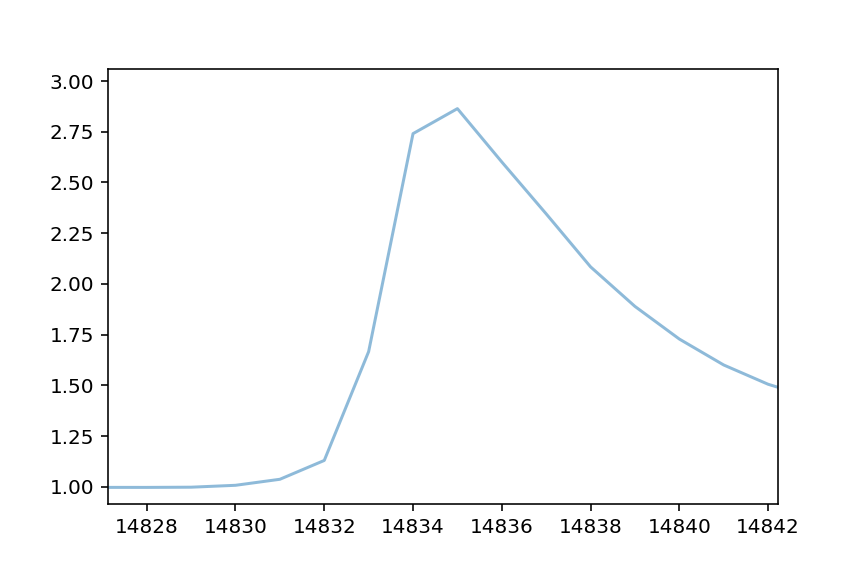

In [169]:
plt.plot(lc[0]['flux'].value/np.nanmedian(lc[0]['flux'].value), alpha=0.5)


<IPython.core.display.Javascript object>


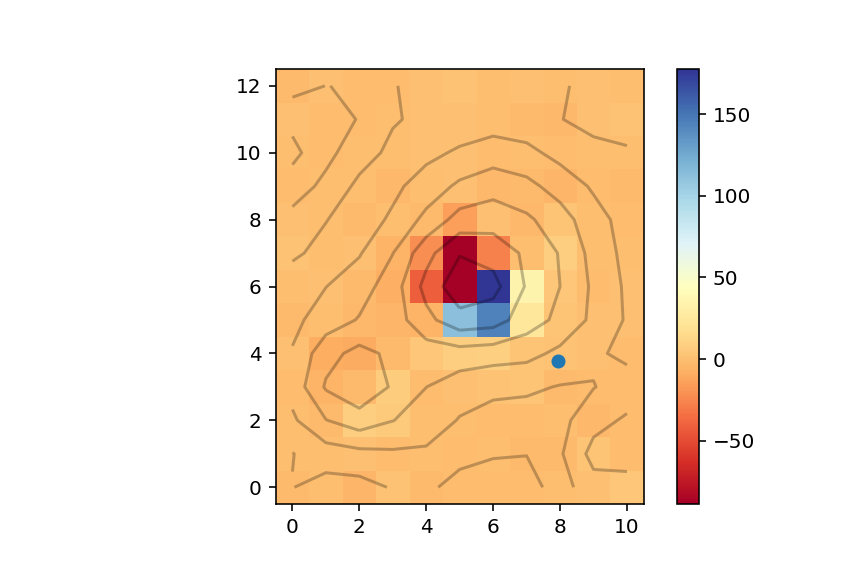

In [236]:
diff = np.nanmedian(tpf.flux.value[14834:14836,:,:],axis=0) - np.nanmedian(tpf.flux.value[14820:14830,:,:],axis=0)
plt.imshow(diff, cmap=plt.cm.RdYlBu, origin='lower')
plt.colorbar()
# plt.clim(-3*np.std(diff), 3*np.std(diff))

plt.contour(np.log10(np.nanmedian(tpf.flux.value[:,:,:],axis=0)+2), alpha=0.25, colors='k')
plt.scatter(center_of_mass(diff)[1], center_of_mass(diff)[0])

<IPython.core.display.Javascript object>


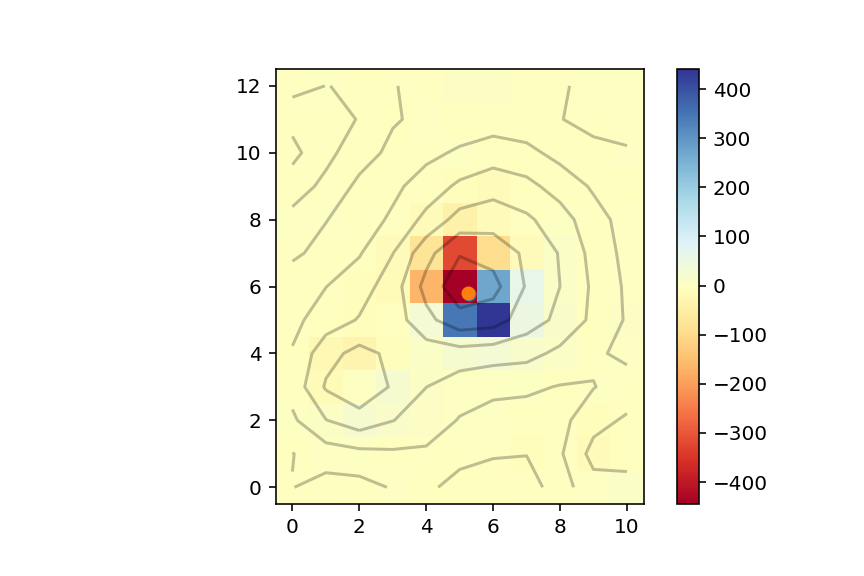

In [248]:
diff = (tpf.flux.value[14835,:,:]) - tpf.flux.value[14839,:,:]
plt.imshow(diff, cmap=plt.cm.RdYlBu, origin='lower')
plt.colorbar()
# plt.clim(-3*np.std(diff), 3*np.std(diff))

plt.contour(np.log10(np.nanmedian(tpf.flux.value[:,:,:],axis=0)+2), alpha=0.25, colors='k')

plt.scatter(center_of_mass(tpf.flux.value[14835,:,:])[1], center_of_mass(tpf.flux.value[14835,:,:])[0])
plt.scatter(center_of_mass(tpf.flux.value[14839,:,:])[1], center_of_mass(tpf.flux.value[14839,:,:])[0])

In [258]:
print(center_of_mass(np.log10(tpf.flux.value[14835,:,:]+10)),COM)

(5.701823578680761, 5.183211361953475) (5.6167910135570684, 5.280928896903445)


In [264]:
COMx = np.zeros_like(tpf.time.value)
COMy = np.zeros_like(tpf.time.value)

for k in range(len(COMx)):
    tmp = center_of_mass(tpf.flux.value[k,:,:])
    COMx[k] = tmp[1]
    COMy[k] = tmp[0]

<IPython.core.display.Javascript object>


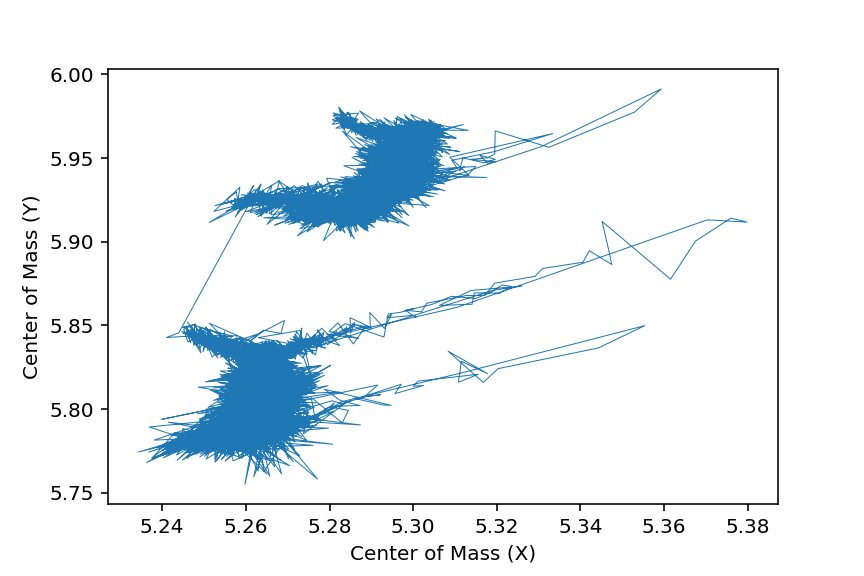

Text(0, 0.5, 'Center of Mass (Y)')

In [436]:
plt.plot(COMx, COMy,lw=0.5)
plt.xlabel('Center of Mass (X)')
plt.ylabel('Center of Mass (Y)')

<IPython.core.display.Javascript object>


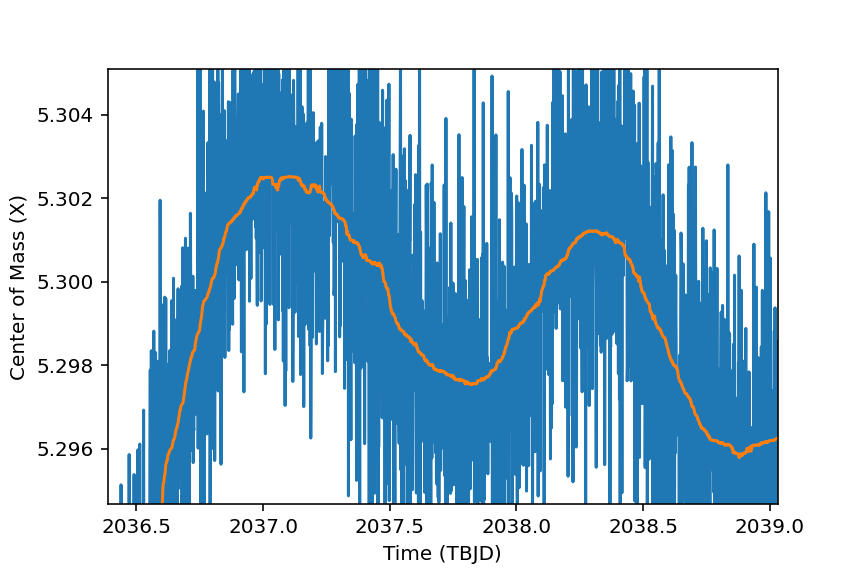

Text(0, 0.5, 'Center of Mass (X)')

In [438]:
plt.plot(tpf.time.value, COMx)
plt.plot(tpf.time.value, pd.Series(COMx).rolling(300, center=True).median())
plt.xlabel('Time (TBJD)')
plt.ylabel('Center of Mass (X)')

<IPython.core.display.Javascript object>


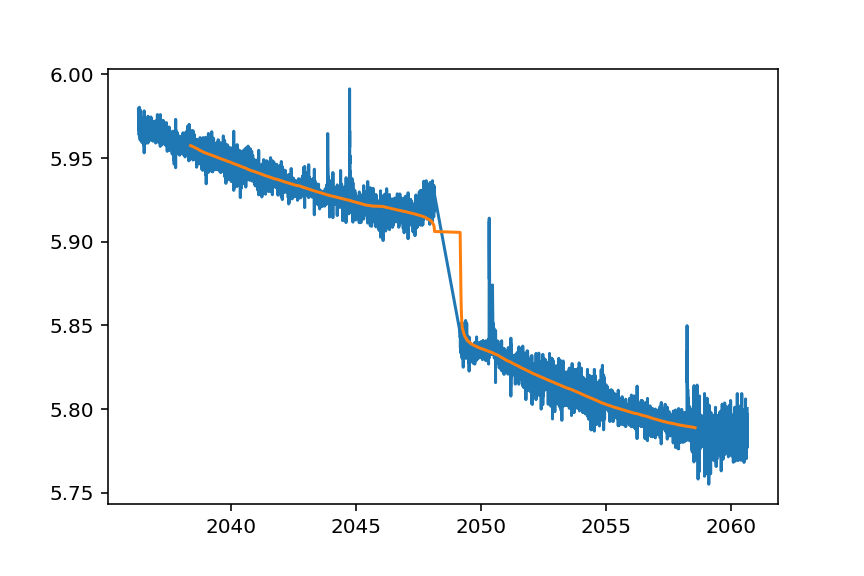

In [318]:
plt.plot(tpf.time.value, COMy)
plt.plot(tpf.time.value, pd.Series(COMy).rolling(300, center=True).median())



<IPython.core.display.Javascript object>


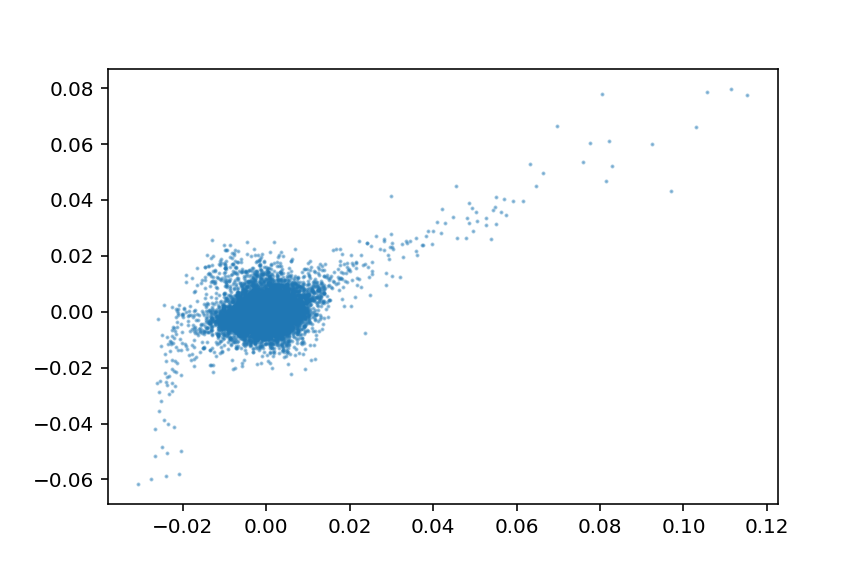

In [324]:
plt.scatter(COMx - pd.Series(COMx).rolling(3000, center=True).median(), 
            COMy - pd.Series(COMy).rolling(3000, center=True).median(),s=1, alpha=0.4)

# plt.contour(np.log10(np.nanmedian(tpf.flux.value[:,:,:],axis=0)+2), alpha=0.25, colors='k')



<IPython.core.display.Javascript object>


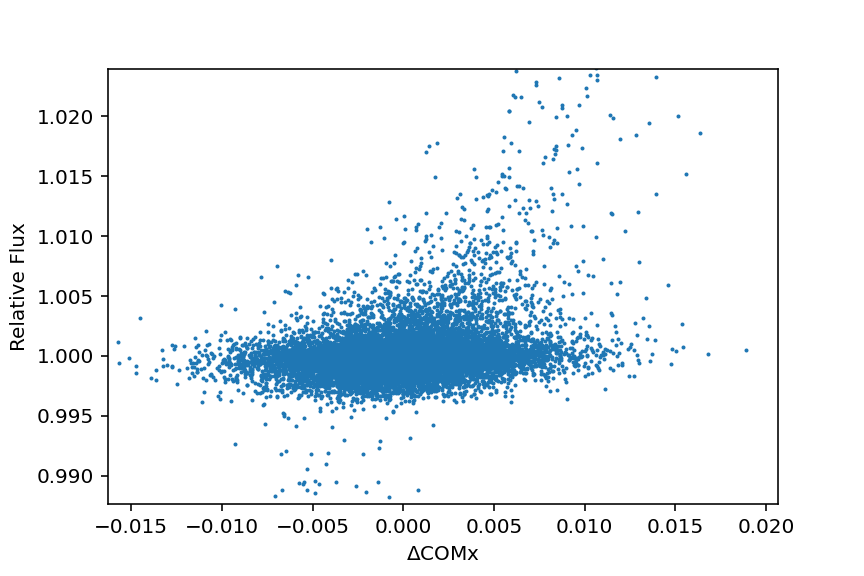

Text(0, 0.5, 'Relative Flux')

In [342]:
plt.scatter(COMx - pd.Series(COMx).rolling(300, center=True).median(), 
         tpf.to_lightcurve()['flux'].value/pd.Series(tpf.to_lightcurve()['flux'].value).rolling(300, center=True).median(), s=1)
plt.xlabel('$\Delta$COMx')
plt.ylabel('Relative Flux')


<IPython.core.display.Javascript object>


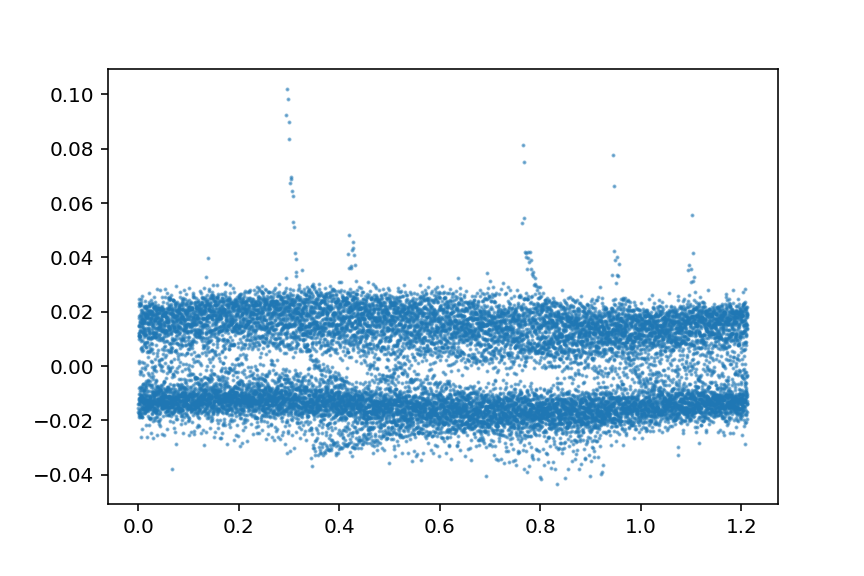

In [314]:
plt.scatter(tpf.time.value % Per[0], 
            (COMx-np.nanmean(COMx)),
            s=1, alpha=0.5)

In [313]:
tpf.time.value

array([2036.28404734, 2036.2868252 , 2036.28821412, ..., 2060.64409707,
       2060.64548596, 2060.64687485])

<IPython.core.display.Javascript object>


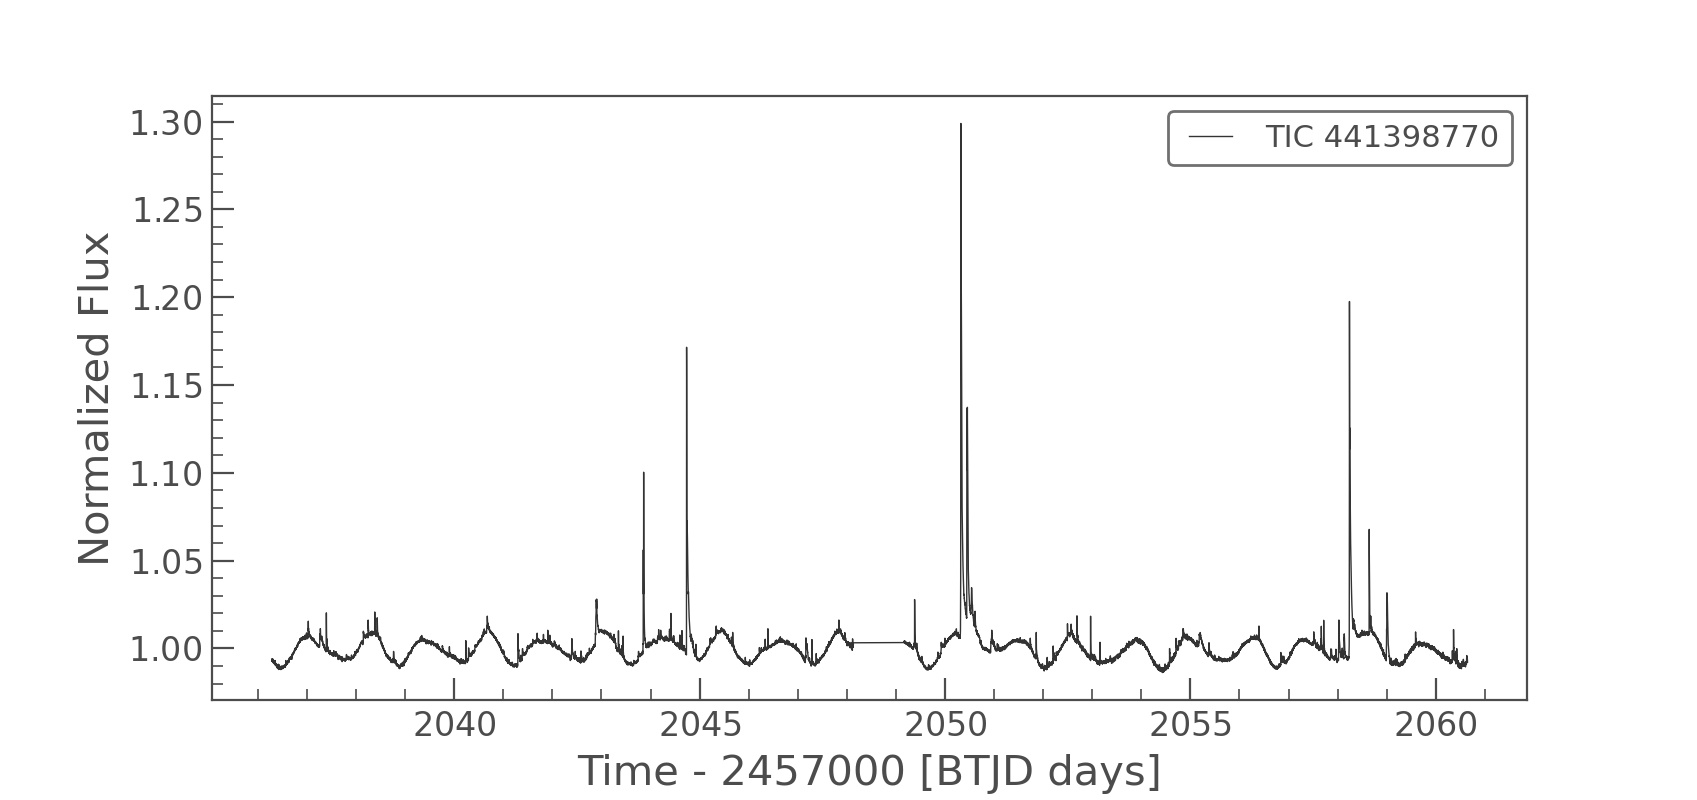

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [375]:
tpf.to_lightcurve().normalize().plot()

In [343]:
lc3 = tpf.to_lightcurve().normalize()

<IPython.core.display.Javascript object>


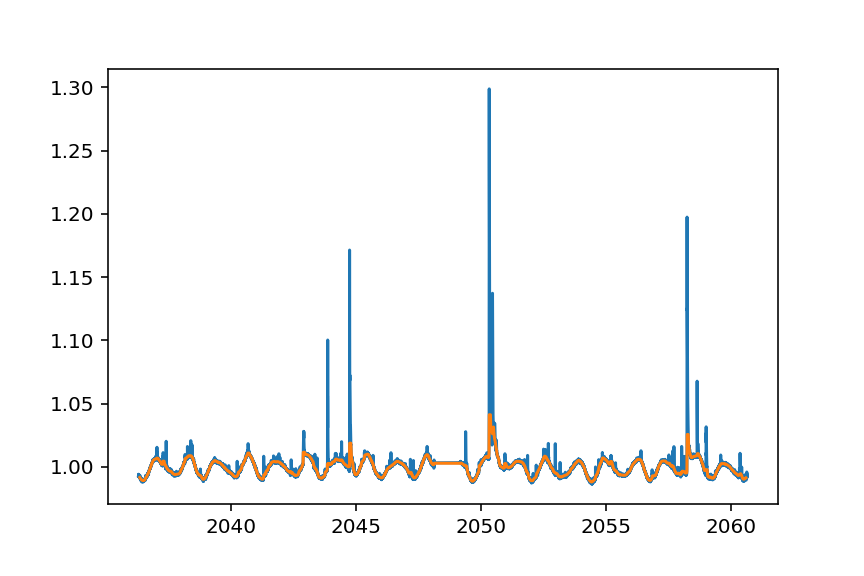

In [353]:
plt.plot(lc3.time.value, lc3.flux.value)
plt.plot(lc3.time.value, pd.Series(lc3.flux.value).rolling(75, center=True).median())

flz = np.where((lc3.flux.value - pd.Series(lc3.flux.value).rolling(75, center=True).median() > 0.001) & 
               np.isfinite(lc3.flux.value - pd.Series(lc3.flux.value).rolling(75, center=True).median()))[0]

<IPython.core.display.Javascript object>


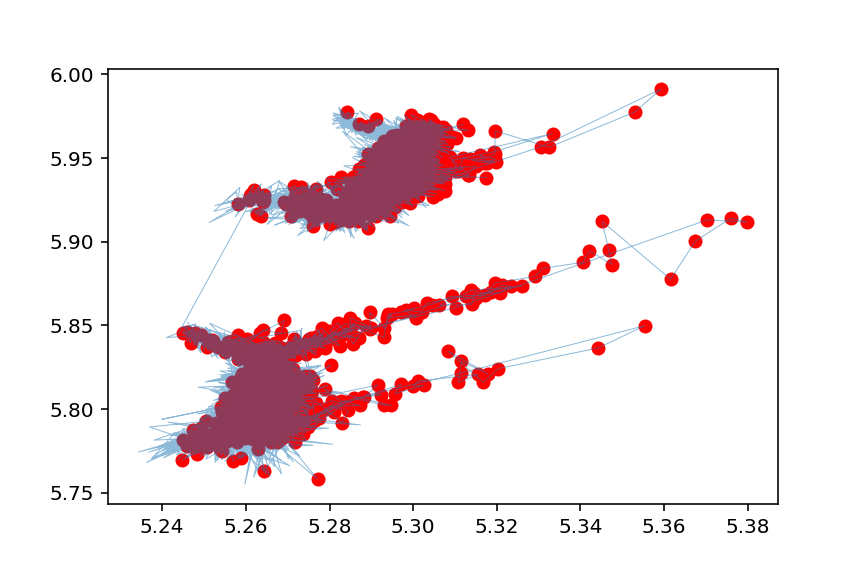

In [356]:
plt.plot(COMx, COMy,lw=0.5, alpha=0.5)
plt.scatter(COMx[flz], COMy[flz], c='r')

<IPython.core.display.Javascript object>


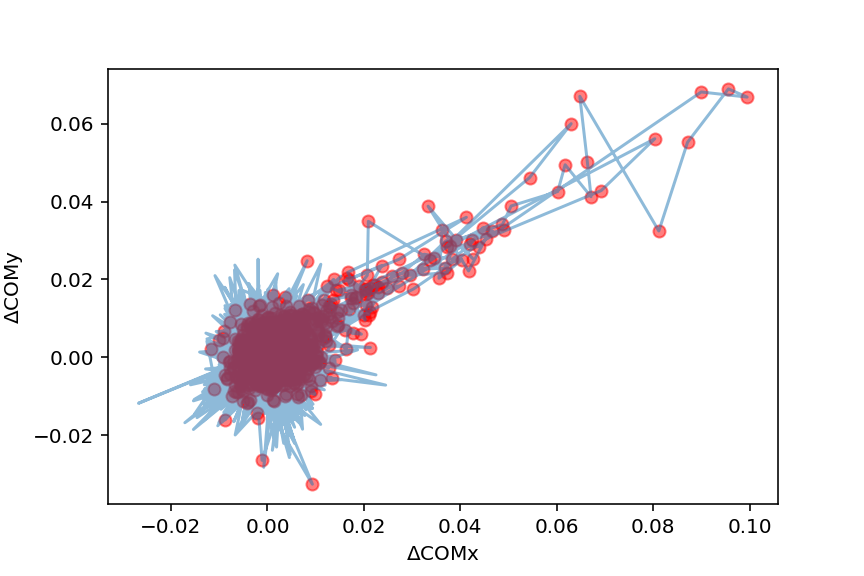

Text(0, 0.5, '$\\Delta$COMy')

In [366]:

plt.plot(COMx - pd.Series(COMx).rolling(75, center=True).median(), 
         COMy - pd.Series(COMy).rolling(75, center=True).median(), alpha=0.5)
plt.scatter((COMx - pd.Series(COMx).rolling(75, center=True).median())[flz], 
            (COMy - pd.Series(COMy).rolling(75, center=True).median())[flz], c='r', alpha=0.5)

plt.xlabel('$\Delta$COMx')
plt.ylabel('$\Delta$COMy')



In [431]:
flz = np.where((lc3.flux.value - pd.Series(lc3.flux.value).rolling(75, center=True).median() > 0.001) & 
               np.isfinite(lc3.flux.value - pd.Series(lc3.flux.value).rolling(75, center=True).median()))[0]

flz2 = flz[np.where((np.diff(flz) < 3))[0]]

tstart = np.array([], dtype=int)
tstop = np.array([], dtype=int)
for k in range(len(flz2)-1):
    if k == 0:
        tstart = np.append(tstart, flz2[k])
    if flz2[k+1] - flz2[k] > 3:
        tstop = np.append(tstop, flz2[k])
        tstart = np.append(tstart, flz2[k+1])
    if k == len(flz2)-2:
        tstop = np.append(tstop, flz2[k])

tpeak = np.array([],dtype=int)
for k in range(len(tstop)):
    tpeak = np.append(tpeak, tstart[k]-1 + np.argmax(lc3.flux.value[(tstart[k]-1):(tstop[k]+1)]))

print(len(tstart), len(tstop), len(tpeak))
# flz3 = flz2[np.where(((flz2[0:-1] - flz2[1:]) < -1))[0]]
# flz4 = flz2[np.where(((flz2[1:] - flz2[0:-1]) > 1))[0]]
# print(len(flz3), len(flz4))

200 200 200


In [432]:
tpeak

array([  507,   533,   710,   730,   798,   820,   904,   935,   944,
        1109,  1339,  1347,  1382,  1409,  1506,  1542,  1589,  1782,
        1998,  2174,  2185,  2190,  2195,  2498,  2508,  2601,  2691,
        2772,  2803,  2842,  2883,  3100,  3112,  3157,  3169,  3392,
        3521,  3607,  3674,  3748,  3824,  3889,  3981,  3985,  4044,
        4074,  4141,  4212,  4346,  4390,  4439,  4523,  4647,  4754,
        5008,  5021,  5073,  5122,  5141,  5256,  5298,  5368,  5443,
        5511,  5585,  5649,  5663,  5693,  5760,  5777,  5823,  5843,
        5884,  5973,  6005,  6073,  6142,  6163,  6209,  6418,  6426,
        6500,  6507,  6580,  6683,  6731,  6749,  6762,  6934,  7141,
        7170,  7226,  7266,  7434,  7448,  7681,  7825,  7912,  7925,
        7975,  8124,  8278,  8307,  8331,  8393,  8443,  8483,  8508,
        8529,  8670,  8678,  8709,  8882,  9020,  9069,  9077,  9123,
        9290,  9314,  9357,  9452,  9514,  9565,  9650,  9810,  9846,
        9892,  9907,

<IPython.core.display.Javascript object>


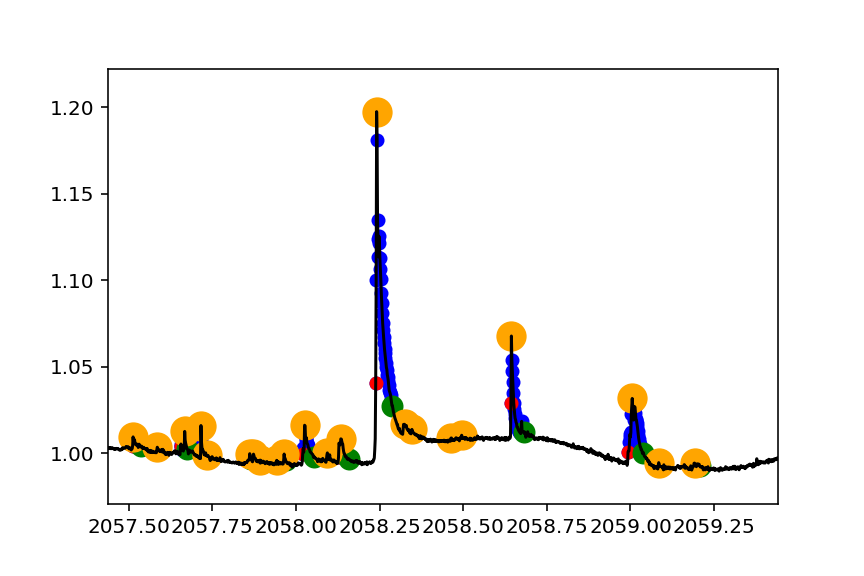

In [433]:
# tpf.to_lightcurve().normalize().plot()
plt.plot(tpf.time.value, tpf.to_lightcurve().normalize().flux.value, c='k')
plt.scatter(tpf.time.value[flz2], tpf.to_lightcurve().normalize().flux.value[flz2], c='b')
plt.scatter(tpf.time.value[tstart], tpf.to_lightcurve().normalize().flux.value[tstart], c='r')
plt.scatter(tpf.time.value[tstop], tpf.to_lightcurve().normalize().flux.value[tstop], c='g',s=100)
plt.scatter(tpf.time.value[tpeak], tpf.to_lightcurve().normalize().flux.value[tpeak], c='orange',s=200)



In [418]:
tstart

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.172e+03, 1.173e+03,
       1.174e+03])

In [434]:
len(tstart)

200

In [437]:
tpf.shape

(16781, 13, 11)